<a href="https://colab.research.google.com/github/ayd13/Machine-learning-projects/blob/master/TF2_0_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

Loading the fashion mnist dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Let's make sure the input pixel data is float64. We'll also split off some validation data.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's see what the data looks like. Rerun to see more examples.

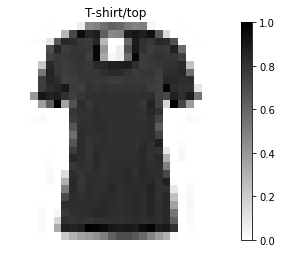

In [ ]:
rand_idx = np.random.choice(range(X_train.shape[0]))
plt.imshow(X_train[rand_idx], cmap="binary")
plt.colorbar()
plt.axis('off')
plt.title(class_names[y_train[rand_idx]]);

Build the dense model.

In [ ]:
img_size = (28, 28)
layer_sizes = (128, 64)
n_classes = 10

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=img_size),
    Dense(layer_sizes[0], activation='selu',
          kernel_initializer='lecun_normal'),
    Dense(layer_sizes[1], activation='selu',
          kernel_initializer='lecun_normal'),
    Dense(n_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learning_rate = 0.005
n_epochs = 20

In [ ]:
from tensorflow.keras.optimizers import Nadam

optimizer = Nadam(lr=learning_rate)

In [ ]:
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_cb = ModelCheckpoint("dense_fashion_model.h5",
                          save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[save_cb])

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5325 - accuracy: 0.8064 - val_loss: 0.5203 - val_accuracy: 0.8118
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4146 - accuracy: 0.8491 - val_loss: 0.3680 - val_accuracy: 0.8674
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3808 - accuracy: 0.8620 - val_loss: 0.4845 - val_accuracy: 0.8310
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3629 - accuracy: 0.8684 - val_loss: 0.3668 - val_accuracy: 0.8730
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3474 - accuracy: 0.8739 - val_loss: 0.3529 - val_accuracy: 0.8738
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3337 - accuracy: 0.8784 - val_loss: 0.3542 - val_accuracy: 0.8768
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3256 - accuracy: 0.8831 - val_loss: 0.3581 - val_accuracy:

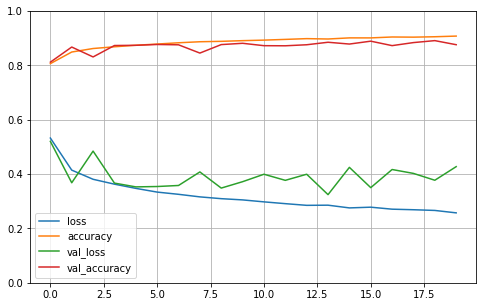

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1);

Evaluate the model.

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('dense_fashion_model.h5')

In [ ]:
y_hat = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


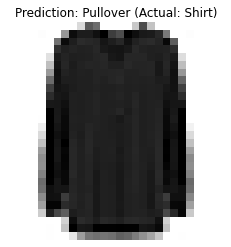

In [ ]:
def plot_prediction():
    rand_idx = np.random.choice(range(X_test.shape[0]))
    image = X_test[rand_idx].squeeze()
    prediction = class_names[y_hat[rand_idx]]
    actual = class_names[y_test[rand_idx]]

    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(f"Prediction: {prediction} (Actual: {actual})")

plot_prediction()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.74      0.84      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.83      0.77      0.80      1000
           5       0.98      0.95      0.96      1000
           6       0.71      0.62      0.66      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.95      0.96      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train = X_train[..., None]
X_valid = X_valid[..., None]
X_test = X_test[..., None]

In [ ]:
X_train.shape

(55000, 28, 28, 1)

Build the convolutional model.

In [ ]:
img_size = (28, 28, 1)
layer_sizes = (128, 64)
n_filters = (64, 128, 256)
kernel_sizes = (7, 3, 3)
pool_size = 2
drop_prob = 0.5

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

model = Sequential([
    Conv2D(n_filters[0], kernel_sizes[0],
           activation='relu', padding='same',
           input_shape=img_size),
    MaxPooling2D(pool_size),
    Conv2D(n_filters[1], kernel_sizes[1],
           activation='relu', padding='same'),
     Conv2D(n_filters[1], kernel_sizes[1],
           activation='relu', padding='same'),
    MaxPooling2D(pool_size),
    Conv2D(n_filters[2], kernel_sizes[2],
           activation='relu', padding='same'),
    Conv2D(n_filters[2], kernel_sizes[2],
           activation='relu', padding='same'),
    MaxPooling2D(pool_size),
    Flatten(),
    Dense(layer_sizes[0], activation='relu'),
    Dense(layer_sizes[1], activation='relu'),
    Dropout(drop_prob),
    Dense(n_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)        

In [ ]:
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

save_cb = ModelCheckpoint("conv_fashion_model.h5",
                          save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[save_cb])

Epoch 1/20
1719/1719 [==============================] - 748s 435ms/step - loss: 0.5622 - accuracy: 0.8011 - val_loss: 0.3154 - val_accuracy: 0.8872
Epoch 2/20
1719/1719 [==============================] - 763s 444ms/step - loss: 0.3409 - accuracy: 0.8800 - val_loss: 0.2946 - val_accuracy: 0.8966
Epoch 3/20
1719/1719 [==============================] - 747s 434ms/step - loss: 0.2988 - accuracy: 0.8962 - val_loss: 0.2542 - val_accuracy: 0.9054
Epoch 4/20
1719/1719 [==============================] - 786s 457ms/step - loss: 0.2637 - accuracy: 0.9061 - val_loss: 0.2406 - val_accuracy: 0.9124
Epoch 5/20
1719/1719 [==============================] - 789s 459ms/step - loss: 0.2363 - accuracy: 0.9150 - val_loss: 0.2397 - val_accuracy: 0.9118
Epoch 6/20
1719/1719 [==============================] - 758s 441ms/step - loss: 0.2200 - accuracy: 0.9214 - val_loss: 0.2370 - val_accuracy: 0.9166
Epoch 7/20
1719/1719 [==============================] - 765s 445ms/step - loss: 0.2012 - accuracy: 0.9279 - val_

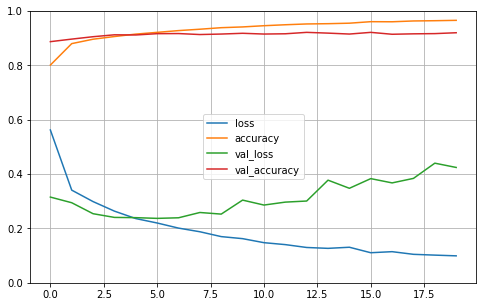

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1);

Evaluate the model.

In [ ]:
model = load_model('conv_fashion_model.h5')
y_hat = model.predict_classes(X_test)

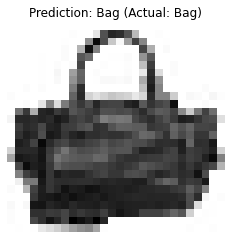

In [ ]:
plot_prediction()

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.79      0.84      1000
           3       0.93      0.91      0.92      1000
           4       0.79      0.89      0.84      1000
           5       0.97      0.99      0.98      1000
           6       0.75      0.73      0.74      1000
           7       0.96      0.98      0.97      1000
           8       0.97      0.99      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

